In [13]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from dask import delayed

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature


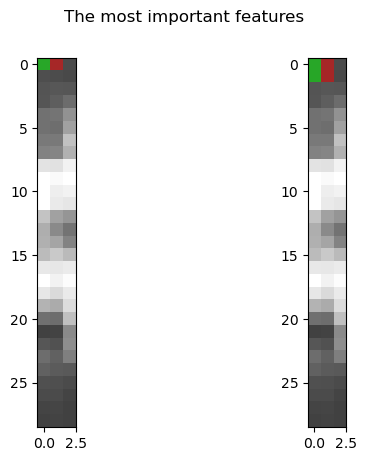

In [33]:
@delayed
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)

feature_types = ['type-2-x', 'type-2-y']

images = cv2.imread("00000.ppm")

X = np.array(extract_feature_image(images, feature_types))

feature_coord, feature_type = \
    haar_like_feature_coord(width=images.shape[2], height=images.shape[1],
                            feature_type=feature_types)

fig, axes = plt.subplots(1, 2)
for idx, ax in enumerate(axes.ravel()):
    image = images[0]
    image = draw_haar_like_feature(image, 0, 0,
                                   images.shape[2],
                                   images.shape[1],
                                   [feature_coord[idx]])
    ax.imshow(image)

_ = fig.suptitle('The most important features')

# Load the image
image = imread(image_path)

# Convert the image to grayscale
image_gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])


# Resize the image to 40x40 pixels using bilinear interpolation
image_resized = resize(image_gray, (40, 40), mode='reflect')



# Define the Haar-like features
feature_types = ['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4',
                 'type-4', 'type-3-x', 'type-3-y', 'type-4', 'type-4',
                 'type-2-x', 'type-2-x', 'type-3-x', 'type-3-x']
feature_sizes = [4, 4, 6, 6, 8, 8, 6, 6, 9, 9, 6, 6, 10, 10]

# Extract Haar-like features and store their responses
haar_features = []
for feature_type, feature_size in zip(feature_types, feature_sizes):
    coords, _ = haar_like_feature_coord(image_resized.shape[0], image_resized.shape[1], feature_type=feature_type)
    coords = [(c[0]*feature_size, c[1]*feature_size, c[2]*feature_size, c[3]*feature_size) for c in coords]
    haar_features.extend(haar_like_feature(image_resized, coords))



# Print the responses of the extracted Haar-like features
for feature_response in haar_features:
    print(feature_response)